<a href="https://colab.research.google.com/github/plaban1981/Langchain_usecases/blob/main/LLMs_on_your_own_machine_using_CTransformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install ctransformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 27.4 MB/s eta 0:00:00


In [7]:
from ctransformers import AutoModelForCausalLM
from rich.console import Console
import time
import os

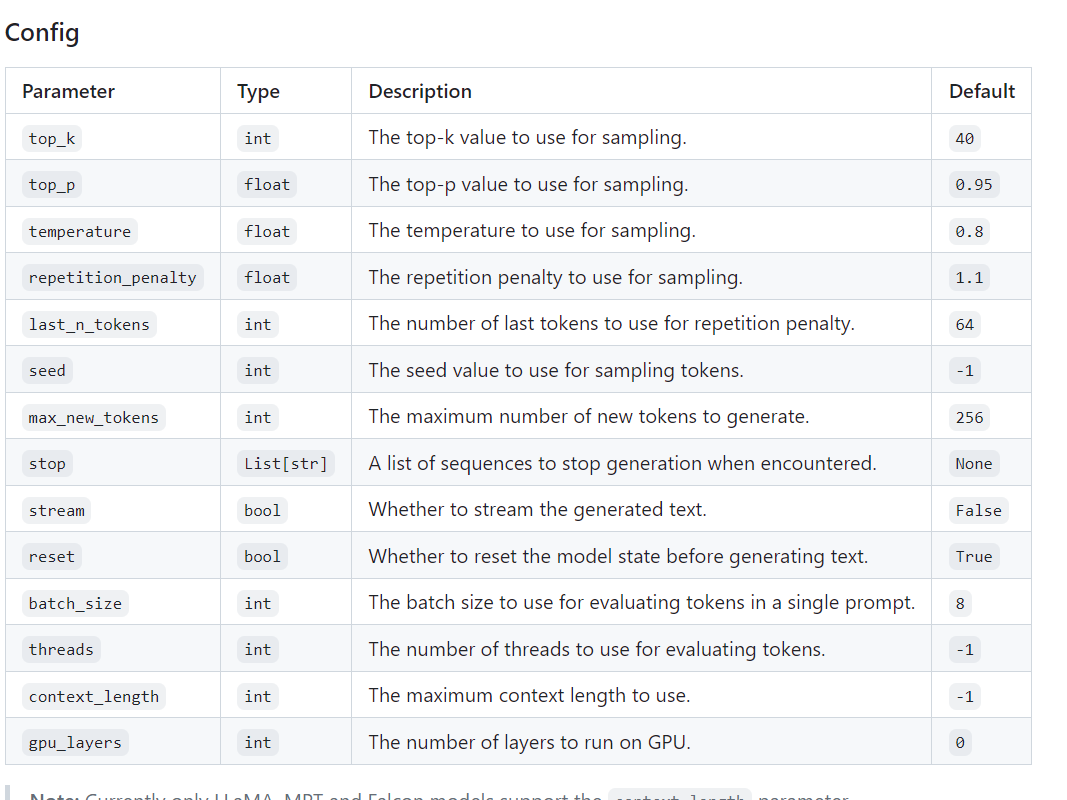

Note: Currently only LLaMA, MPT and Falcon models support the context_length parameter.

In [3]:
model_id ="zephyr-7b-beta.Q4_K_M.gguf"
model = AutoModelForCausalLM.from_pretrained(model_path_or_repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                                             model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
                                             model_type = "mistral",
                                             gpu_layers=0)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

(…)a64a14aea61a4c468bbbf9f258a8/config.json:   0%|          | 0.00/31.0 [00:00<?, ?B/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

mistral-7b-instruct-v0.1.Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

In [5]:
start = time.time()
chars = 0
args ={"prompt": "What is balckhole?",
        "stream":True,
        "max_new_tokens":256}
#
for chunk in model(**args):
    print(chunk,end="")
    chars += len(chunk)
end = time.time()
print(f"\n 'Time Taken : {end - start:.2f} seconds")
print(f"\n Chars generated per seconds {chars/(end - start):.2f} ")


<generator object LLM._stream at 0x7cbace4a5310>

 A  black  hole  is  a  region  of  space  where  gravity  is  so  strong  that  nothing ,  not  even  light ,  can  escape .  It  results  from  the  war ping  of  space  and  time  caused  by  the  presence  of  an  extremely  massive  object ,  such  as  a  dead  star  or  the  remains  of  a  super n ova  explosion .  Black  holes  are  invisible ,  but  their  effects  can  be  observed  through  the  grav itational  pull  they  ex ert  on  nearby  objects . 
 'Time Taken : 81.00 seconds

 Chars generated 4.78 seconds


In [8]:
model = AutoModelForCausalLM.from_pretrained(model_path_or_repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                                             model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
                                             model_type = "mistral",
                                             gpu_layers=0,
                                             threads = int(os.cpu_count()/2))

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
start = time.time()
chars = 0
args ={"prompt": "What is balckhole?",
        "stream":True,
        "max_new_tokens":256}
#
for chunk in model(**args):
    print(chunk,end="")
    chars += len(chunk)
end = time.time()
print(f"\n 'Time Taken : {end - start:.2f} seconds")
print(f"\n Chars generated per seconds {chars/(end - start):.2f} ")


A black hole is a region in space with such strong gravitational pull that nothing, not even light, can escape. Black holes are formed when stars die and their outer layers are expelled into space, leaving behind a dense core. The core collapses under its own gravity, creating a singularity, an infinitely dense and small point at the center of the black hole.

Black holes are invisible, but their presence can be detected by observing the effects of their gravitational pull on nearby matter. They can also be observed through the emission of X-rays and other high-energy radiation as matter falls into the black hole.
 'Time Taken : 134.68 seconds

 Chars generated per seconds 4.62 


In [10]:
int(os.cpu_count()/2)

1

In [11]:
model = AutoModelForCausalLM.from_pretrained(model_path_or_repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                                             model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
                                             model_type = "mistral",
                                             gpu_layers=0,
                                             threads = int(os.cpu_count()/2),
                                             top_p=1)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
start = time.time()
chars = 0
args ={"prompt": "What is balckhole?",
        "stream":True,
        "max_new_tokens":256}
#
for chunk in model(**args):
    print(chunk,end="")
    chars += len(chunk)
end = time.time()
print(f"\n Time Taken : {end - start:.2f} seconds")
print(f"\n Chars generated per seconds {chars/(end - start):.2f} ")


Answer: A black hole is a region in space with such strong gravitational forces that nothing, not even light, can escape it. Black holes are typically formed from the collapse of the remnants of massive stars and can be incredibly dense.
 Time Taken : 60.34 seconds

 Chars generated per seconds 3.94 


## Arguements

Args:

* model_path_or_repo_id: The path to a model file or directory or the name of a Hugging Face Hub model repo.
* model_type: The model type.
* model_file: The name of the model file in repo or directory.
* config: AutoConfig object.
* lib: The path to a shared library or one of avx2, avx, basic.
* local_files_only: Whether or not to only look at local files (i.e., do not try to download the model).
* revision: The specific model version to use. It can be a branch name, a tag name, or a commit id.
* hf: Whether to create a Hugging Face Transformers model.

In [13]:
model = AutoModelForCausalLM.from_pretrained(model_path_or_repo_id="TheBloke/Mistral-7B-Instruct-v0.1-GGUF",
                                             model_file="mistral-7b-instruct-v0.1.Q4_K_M.gguf",
                                             model_type = "mistral",
                                             gpu_layers=0,
                                             threads = int(os.cpu_count()/2),
                                             top_p=60)

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

Fetching 1 files:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
start = time.time()
chars = 0
args ={"prompt": "What is balckhole?",
        "stream":True,
        "max_new_tokens":256}
#
for chunk in model(**args):
    print(chunk,end="")
    chars += len(chunk)
end = time.time()
print(f"\n Time Taken : {end - start:.2f} seconds")
print(f"\n Chars generated per seconds {chars/(end - start):.2f} ")


A: A black hole is a region in space where gravity is so strong that nothing, not even light, can escape from it. Black holes are formed when massive stars collapse under their own gravity after they have exhausted their nuclear fuel. They are invisible to the naked eye, but their presence can be inferred from their gravitational effects on nearby matter, such as stars and gas. The study of black holes provides important insights into the nature of gravity, space, and time.
 Time Taken : 107.61 seconds

 Chars generated per seconds 4.45 
